In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay

from statistics import stdev
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
samples, features = data.shape
print('Number Of Samples: ', samples)
print('Number Of Features: ', features)

Number Of Samples:  100000
Number Of Features:  9


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
data.duplicated().sum()


3854

In [ ]:
data = data.drop_duplicates()

In [ ]:
test = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = np.abs(stats.zscore(test))
data = data[(z < 3).all(axis=1)]

In [ ]:
data.shape

(92542, 9)

In [ ]:
data['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,
                                'not current': 6, 'ever': 7}, inplace=True)
data['gender'].replace({'Male': 2, 'Female': 3, 'Other': 3}, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,80.0,0,1,2,25.19,6.6,140,0
1,3,54.0,0,0,3,27.32,6.6,80,0
2,2,28.0,0,0,2,27.32,5.7,158,0
3,3,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


In [ ]:
target = data['diabetes']
data.drop('diabetes', axis=1, inplace=True)

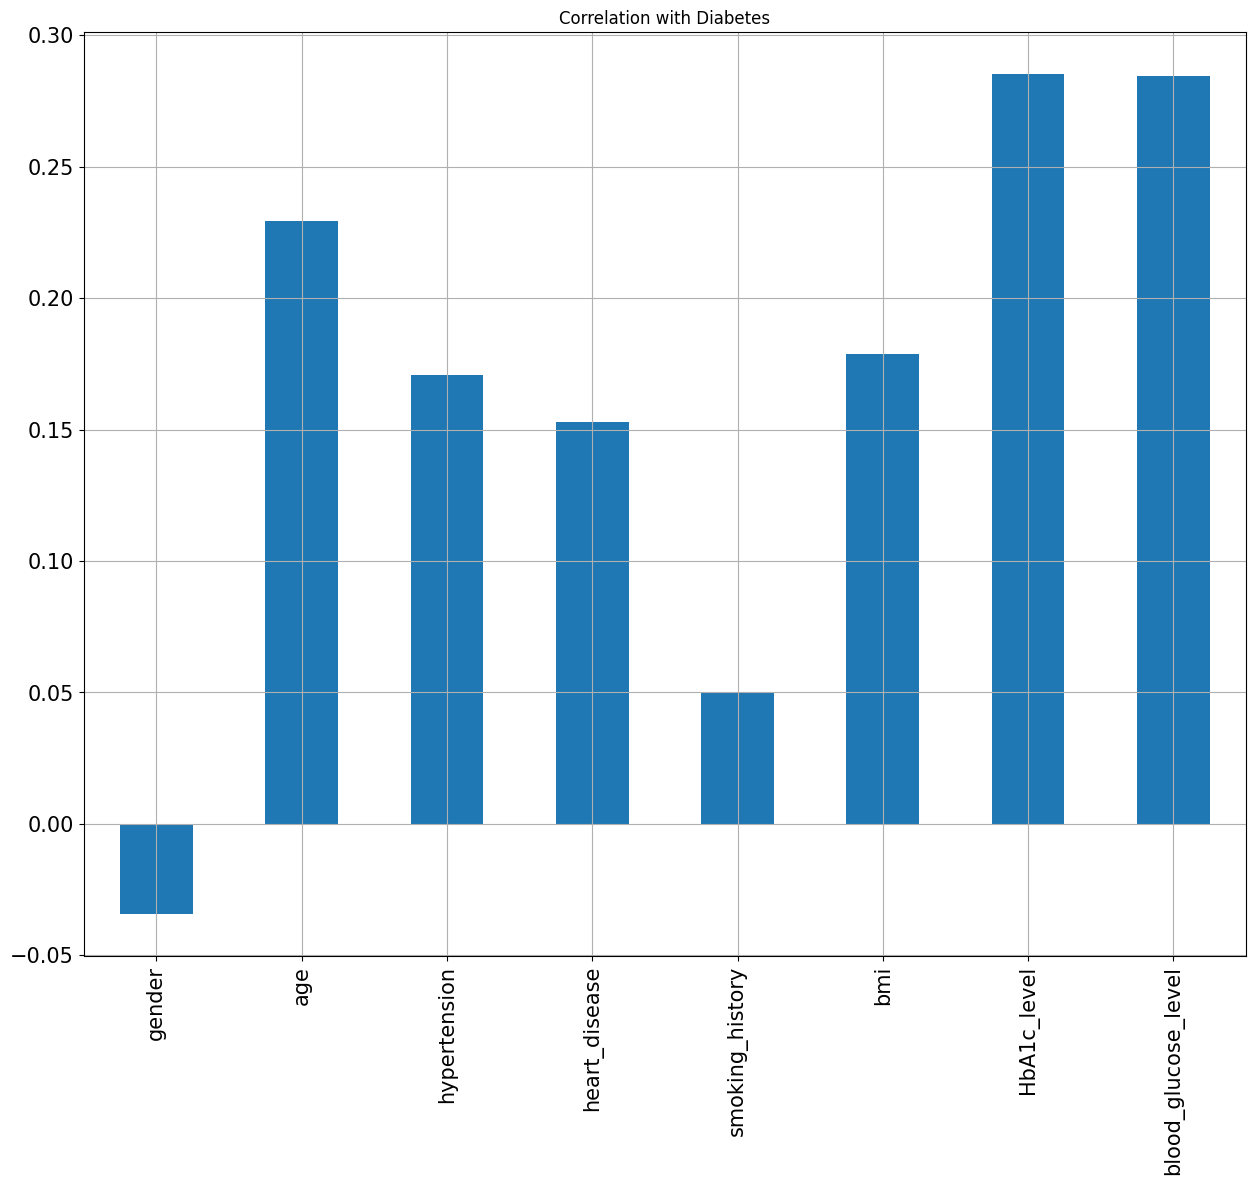

In [ ]:
data.corrwith(target).plot.bar(
    figsize=(15, 12), title='Correlation with Diabetes',
    fontsize=15, rot=90, grid=True)
plt.savefig('5')
plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.30, random_state=42)

In [ ]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [ ]:
cols = xtrain.columns

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)

xtest = scaler.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

<b> MODELING: (KNN)

In [ ]:
knn = KNeighborsClassifier()
param = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['unoform', 'distance']}

gridSearch = GridSearchCV(knn, param, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['unoform', 'distance']},
             scoring='accuracy')

In [ ]:
KNN = gridSearch.best_estimator_
KNN.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
ypred = KNN.predict(xtest)

In [ ]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model Accuracy Score: 0.9603


In [ ]:
# kf = StratifiedKFold(n_splits=10, shuffle=False)

In [ ]:
#Cross Validation Accuracy scores

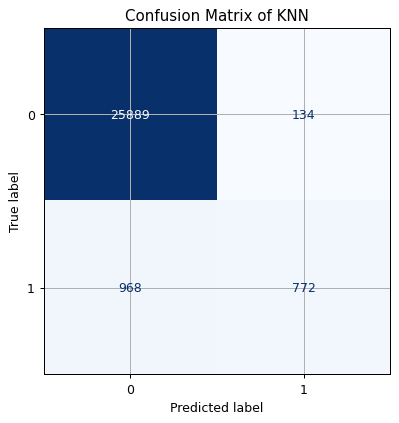

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(KNN, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of KNN')
plt.grid()

In [ ]:
knn_result = metrics_calculator(ytest, ypred, 'KNN')
knn_result

,KNN
Accuracy,0.960307
Precision,0.908027
Recall,0.719264
F1-score,0.781341


<b> MODELING: (Logistic Regression)


In [ ]:
lg = LogisticRegression()
param = {
    'penalty': ['l1', 'l2', 'elasticnet']}

gridSearch = GridSearchCV(lg, param, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
Logistic = gridSearch.best_estimator_
Logistic.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
ypred = Logistic.predict(xtest)

In [ ]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model Accuracy Score: 0.9589


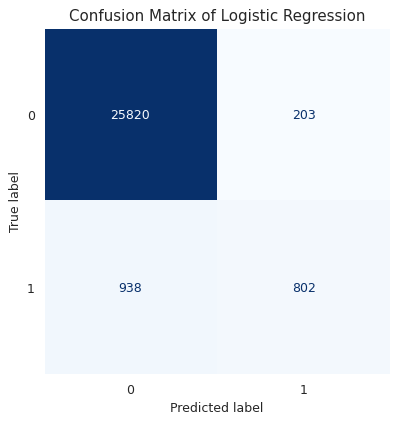

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Logistic, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.grid()

In [ ]:
lg_result = metrics_calculator(ytest, ypred, 'Logistic')
lg_result

,Logistic
Accuracy,0.958902
Precision,0.881478
Recall,0.726559
F1-score,0.781359


<b> MODELING: (Decision Tree Classifier)

In [ ]:
tree = DecisionTreeClassifier()

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)]}

gridSearch = GridSearchCV(tree, param, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [ ]:
Tree = gridSearch.best_estimator_
Tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

In [ ]:
ypred = Tree.predict(xtest)
print(ypred)

[0 0 0 ... 0 0 0]


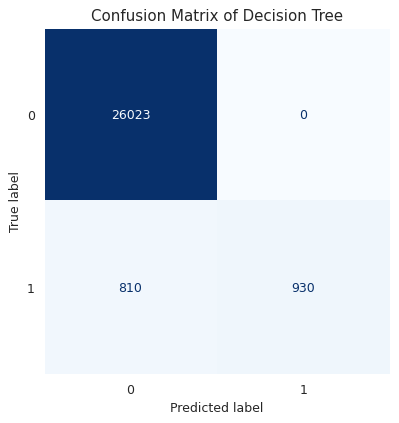

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Tree, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.grid()

In [ ]:
tree_result = metrics_calculator(ytest, ypred, 'Decision Tree')
tree_result

,Decision Tree
Accuracy,0.970824
Precision,0.984907
Recall,0.767241
F1-score,0.840652


In [ ]:
Conclusion = pd.concat([lg_result, knn_result, tree_result], axis=1)
Conclusion

,Logistic,KNN,Decision Tree
Accuracy,0.958902,0.960307,0.970824
Precision,0.881478,0.908027,0.984907
Recall,0.726559,0.719264,0.767241
F1-score,0.781359,0.781341,0.840652


<b> Making Prediction System:


In [ ]:
input_data_1 = (3,42.0,0,0,2,21,10,75)
input_data_2 = (2,50.0,0,0,5,37.16,9.0,159)
input_data_3 = (2,50.0,0,0,5,37.16,6,120)

input_data_1 = np.asarray(input_data_1).reshape(1, -1)
input_data_2 = np.asarray(input_data_2).reshape(1, -1)
input_data_3 = np.asarray(input_data_3).reshape(1, -1)

In [ ]:
print(f'First--> {input_data_1}')
print()
print(f'Second--> {input_data_2}')
print()
print(f'Third-> {input_data_3}')

First--> [[ 3. 42.  0.  0.  2. 21. 10. 75.]]

Second--> [[  2.    50.     0.     0.     5.    37.16   9.   159.  ]]

Third-> [[  2.    50.     0.     0.     5.    37.16   6.   120.  ]]


In [ ]:
new_input_1 = scaler.transform(input_data_1)
new_input_2 = scaler.transform(input_data_2)
new_input_3 = scaler.transform(input_data_3)
prediction_1 = Tree.predict(new_input_1)
prediction_2 = Tree.predict(new_input_2)
prediction_3 = Tree.predict(new_input_3)


In [ ]:
print(prediction_1[0])
if prediction_1[0] == 0:
      print("This person does not have diabetes")
else:
      print('This person has diabetes')

1
This person has diabetes


In [ ]:
print(prediction_2[0])
if prediction_2[0] == 0:
      print("This person does not have diabetes")
else:
      print('This person has diabetes')

1
This person has diabetes


In [ ]:
print(prediction_3[0])
if prediction_3[0] == 0:
      print("This person does not have diabetes")
else:
      print('This person has diabetes')

0
This person does not have diabetes
